In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('fastfood.csv')
columns_drop = ['total_carb', 'fiber', 'protein', 'vit_a', 'vit_c', 'calcium', 'salad', 'total_fat', 'cal_fat','sugar','cholesterol']
df = data.drop(columns_drop, axis=1)
display(df)

,restaurant,item,calories,sat_fat,trans_fat,sodium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,2.0,0.0,1110
1,Mcdonalds,Single Bacon Smokehouse Burger,840,17.0,1.5,1580
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,27.0,3.0,1920
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,10.0,0.5,1940
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,12.0,0.5,1980
...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,10.0,0.5,1850
511,Taco Bell,Express Taco Salad w/ Chips,580,9.0,1.0,1270
512,Taco Bell,Fiesta Taco Salad-Beef,780,10.0,1.0,1340
513,Taco Bell,Fiesta Taco Salad-Chicken,720,7.0,0.0,1260


This is the Bar graph to show the sum of the different ingredients and calories in the items of each fast food restaurant.

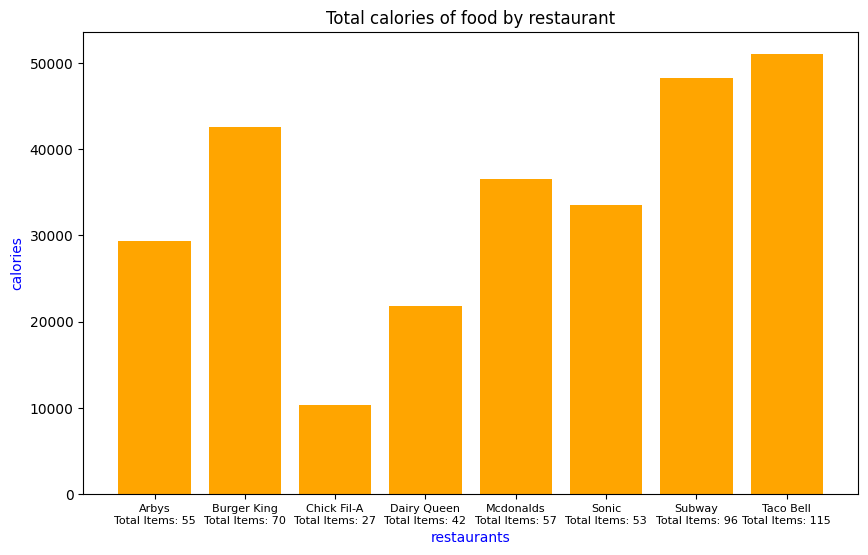

In [ ]:
grouped = df.groupby('restaurant')['calories'].sum() # the groupby function groups the column calories for each restaurant.
total_items = df.groupby('restaurant')['item'].count()

fig, ax = plt.subplots(figsize=(10,6))
graph = ax.bar(range(len(grouped)), grouped, color='orange')

x_labels = [f'{restaurant}\nTotal Items: {total_items[restaurant]}' for restaurant in grouped.index]
ax.set_xticks(range(len(grouped)))
ax.set_xticklabels(x_labels) # the xticklabels function labels the ticks for the x-axis
ax.set(title='Total calories of food by restaurant')

ax.set_ylabel('calories', color='blue')
plt.xticks(rotation=0, fontsize=8)
plt.xlabel('restaurants', color='blue')

plt.show()

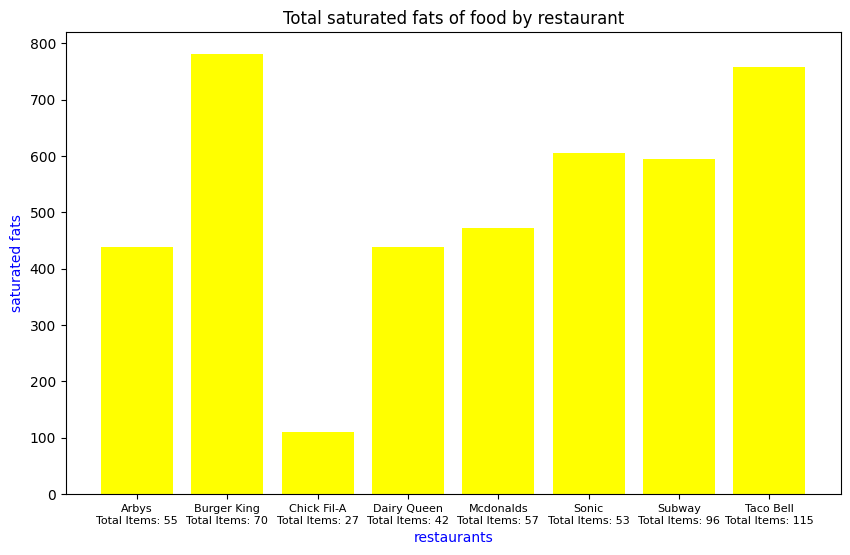

In [ ]:
grouped = df.groupby('restaurant')['sat_fat'].sum()
total_items = df.groupby('restaurant')['item'].count()

fig, ax = plt.subplots(figsize=(10,6))
graph = ax.bar(range(len(grouped)), grouped, color='yellow')

x_labels = [f'{restaurant}\nTotal Items: {total_items[restaurant]}' for restaurant in grouped.index]
ax.set_xticks(range(len(grouped)))
ax.set_xticklabels(x_labels)
ax.set(title='Total saturated fats of food by restaurant')

ax.set_ylabel('saturated fats', color='blue')
plt.xticks(rotation=0, fontsize=8)
plt.xlabel('restaurants', color='blue')

plt.show()

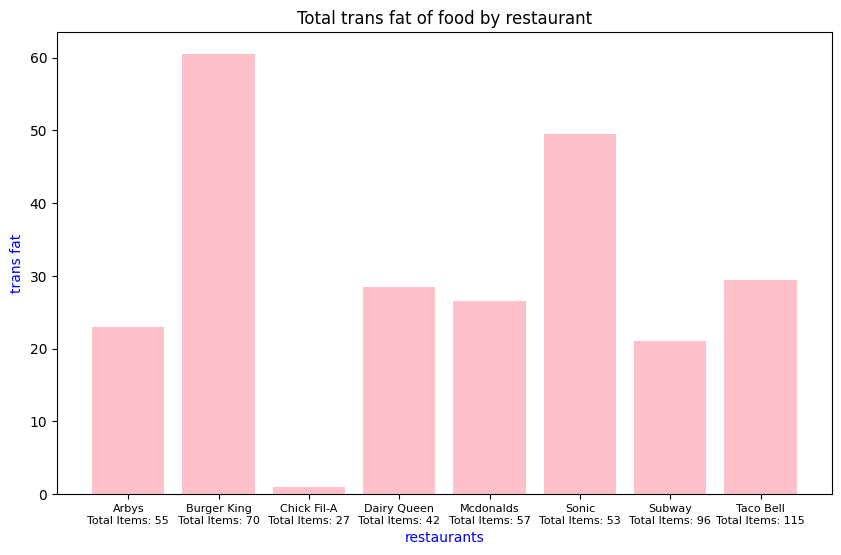

In [ ]:
grouped = df.groupby('restaurant')['trans_fat'].sum()
total_items = df.groupby('restaurant')['item'].count()

fig, ax = plt.subplots(figsize=(10,6))
graph = ax.bar(range(len(grouped)), grouped, color='pink')

x_labels = [f'{restaurant}\nTotal Items: {total_items[restaurant]}' for restaurant in grouped.index]
ax.set_xticks(range(len(grouped)))
ax.set_xticklabels(x_labels)
ax.set(title='Total trans fat of food by restaurant')

ax.set_ylabel('trans fat', color='blue')
plt.xticks(rotation=0, fontsize=8)
plt.xlabel('restaurants', color='blue')

plt.show()

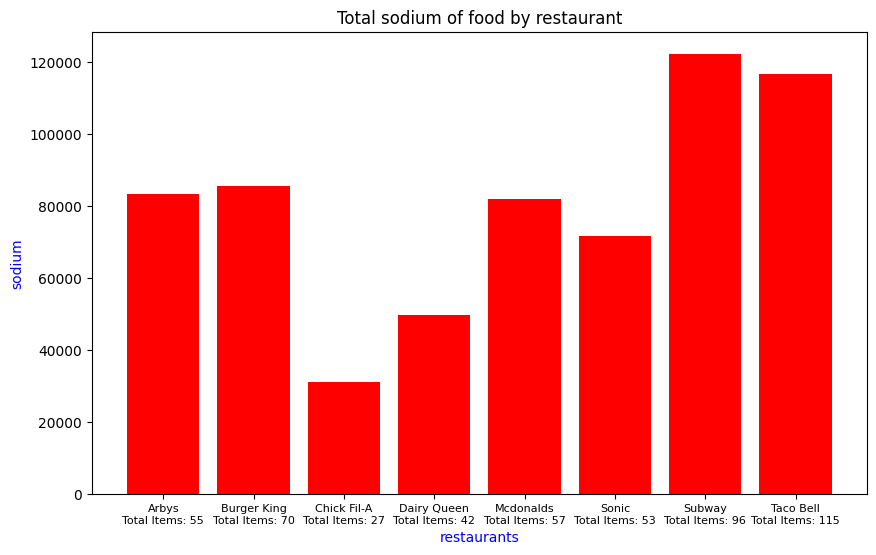

In [ ]:
grouped = df.groupby('restaurant')['sodium'].sum()
total_items = df.groupby('restaurant')['item'].count()

fig, ax = plt.subplots(figsize=(10,6))
graph = ax.bar(range(len(grouped)), grouped, color='red')

x_labels = [f'{restaurant}\nTotal Items: {total_items[restaurant]}' for restaurant in grouped.index]
ax.set_xticks(range(len(grouped)))
ax.set_xticklabels(x_labels)
ax.set(title='Total sodium of food by restaurant')

ax.set_ylabel('sodium', color='blue')
plt.xticks(rotation=0, fontsize=8)
plt.xlabel('restaurants', color='blue')

plt.show()

According to the graphs above, we can see that Taco Bell has the highest amount of total calories. However, they have the most items from the dataset. 50,000/115, about 434 calories per item. If we are just looking at the average, we can see that Subway has the highest, 48000/96, which is about 500 calories per item.

In the graph about saturated fats, we can see that Burger King has the highest total amount of saturated fats, at about 780. Second is Taco Bell at about 760. If we get the average, we can see that Burger King has the most amount of saturated fats, 780/70, which is about 11 per item.

From the graph about trans fat, we can see again that Burger King has the highest total amount of trans fat, at about 60. The second is Sonic, at about 52. From the average, we can see that Sonic has the highest amount of trans fat per item at about (52/53) 0.98 trans fat per item.

From the final graph, which is the graph about the total sodium, we can see that Subway has the highest, at about 121,000. Second is Taco Bell at about 118,000 total sodium. If we look at the average or mean we can see that Subway still has the highest amount of sodium per item, at about (121,000 / 96) 1260 per item.

In conclusion, we can see that Burger King items are heavily concentrated with saturated fats and trans fat. They also have the third highest amount of total calories at about 43,000. This shows that Burger King seems to be the most unhealthy fast food restaurant. However, it is important to keep in mind that the total amount of calories or ingredients depends on the amount of items that are present in the csv file. On the contrary, we can see that Chick Fil-A has the lowest amount of calories, saturated fats, trans fat, and sodium among all the fast food restaurant. However, it is hard to say it is the healthiest due to the fact that only 27 items were in consideration.

While I was researching about this topic, I have found out that foods with high concentration of trans fat and calories are typically very unhealthy.
https://healthbeat.corewellhealth.org/top-10-food-ingredients-to-avoid/

https://www.medicalnewstoday.com/articles/324847#long-term-impacts

Which is why I researched further to find out the recommended consumption amount of calories and trans fat per day.
According to this website from the World Health Organization (WHO) https://www.who.int/news-room/questions-and-answers/item/nutrition-trans-fat#:~:text=International%20expert%20groups%20and%20public,for%20a%202%2C000%2Dcalorie%20diet.

The recommemded amount of trans fat consumed on a daily basis should be less than 2.2g for a 2000 calorie diet. If we assume that people eat at least 3 meals a day, we can assume that a meal should contain 0.733g of trans fat for a 666.67 calorie meal.

Which is why I did a one sample t-test to see if the average calories and trans fat per item from each restaurant is within the recommended amount for calories and trans fat per meal.

In [ ]:
calories_threshold = 667
trans_fat_threshold = 0.74

grouped_df = df.groupby('restaurant')

for restaurant, group_data in grouped_df:

  print(f"\nRestaurant: {restaurant}")

  calories_data = group_data['calories']
  trans_fat_data = group_data['trans_fat']

  t_stat_calories, p_value_calories = stats.ttest_1samp(calories_data, calories_threshold)

  t_stat_trans_fat, p_value_trans_fat = stats.ttest_1samp(trans_fat_data, trans_fat_threshold)

  alpha = 0.05
  if p_value_calories < alpha and t_stat_calories < 0:
      print("Reject Null hypothesis for calories, the average calories per item is less than 667")
  else:
      print("Fail to reject Null hypothesis for calories, the average calories per item is greater than or equal to 667")

  if p_value_trans_fat < alpha and t_stat_trans_fat < 0:
        print("Reject Null hypothesis for trans fat, the average trans fat per item is less than 0.74")
  else:
        print("Fail to reject Null hypothesis for trans fat, the average trans fat per item is greater than or equal to 0.74")


Restaurant: Arbys
Reject Null hypothesis for calories, the average calories per item is less than 667
Reject Null hypothesis for trans fat, the average trans fat per item is less than 0.74

Restaurant: Burger King
Fail to reject Null hypothesis for calories, the average calories per item is greater than or equal to 667
Fail to reject Null hypothesis for trans fat, the average trans fat per item is greater than or equal to 0.74

Restaurant: Chick Fil-A
Reject Null hypothesis for calories, the average calories per item is less than 667
Reject Null hypothesis for trans fat, the average trans fat per item is less than 0.74

Restaurant: Dairy Queen
Reject Null hypothesis for calories, the average calories per item is less than 667
Fail to reject Null hypothesis for trans fat, the average trans fat per item is greater than or equal to 0.74

Restaurant: Mcdonalds
Fail to reject Null hypothesis for calories, the average calories per item is greater than or equal to 667
Reject Null hypothesis 

**Changed**

I have already changed my one sample t-test, to a one sample one tailed t-test.
The NULL hypothesis is that the average calories and trans_fat per item for fast food restaurants are greater than the recommneded amount per meal, according to the World Health Organization.

From the test we can see that Burger King and Sonic are the only restaurants where the average calories and trans_fat per item is higher than the recommended amount.

Then I did a linear regression model for each fast food restaurant. The variables are calories and trans fat.

Mean Squared Error (MSE): 1.5048542096896904


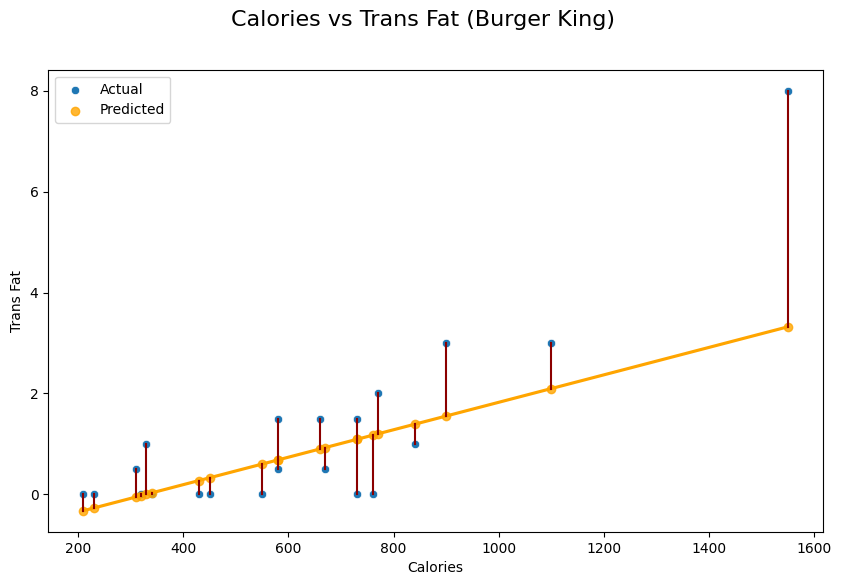

In [ ]:
burger_king_data = df[df['restaurant'] == 'Burger King']
y = burger_king_data['trans_fat']
X = burger_king_data['calories']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
lr = stats.linregress(x_train, y_train)
predictions = x_test * lr.slope + lr.intercept
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
#print(predictions)
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')

sns.regplot(x=x_test, y=predictions, fit_reg=True, ci=None, ax=ax, label='Predicted', color='orange')
ax.legend()
fig.suptitle('Calories vs Trans Fat (Burger King)', fontsize=16)

for i in range(x_test.size):
    plt.plot([x_test.iloc[i], x_test.iloc[i]], [y_test.iloc[i], predictions.iloc[i]], color='darkred')
plt.ylabel('Trans Fat')
plt.xlabel('Calories')
plt.show()

Mean Squared Error (MSE): 0.07230906536914043


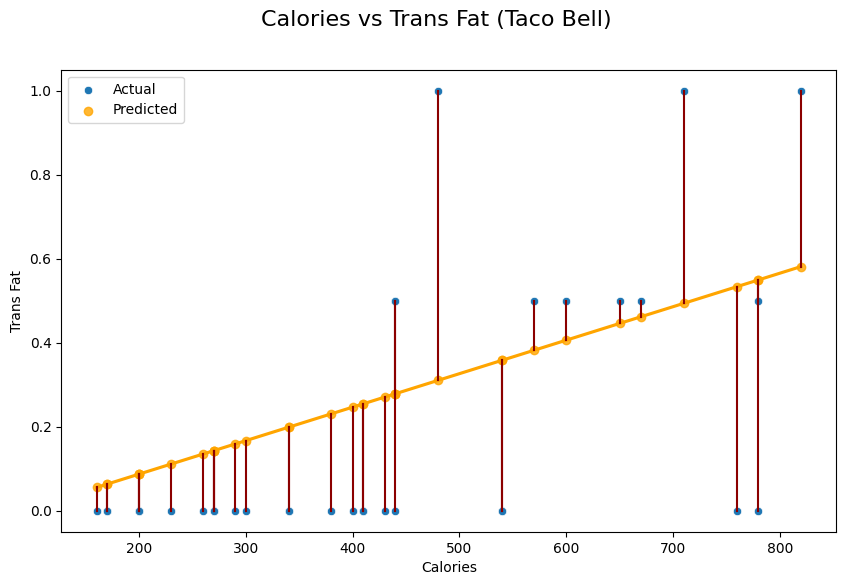

In [ ]:
taco_bell_data = df[df['restaurant'] == 'Taco Bell']
y = taco_bell_data['trans_fat']
X = taco_bell_data['calories']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
lr = stats.linregress(x_train, y_train)
predictions = x_test * lr.slope + lr.intercept
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
#print(predictions)
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')

sns.regplot(x=x_test, y=predictions, fit_reg=True, ci=None, ax=ax, label='Predicted', color='orange')
ax.legend()
fig.suptitle('Calories vs Trans Fat (Taco Bell)', fontsize=16)

for i in range(x_test.size):
    plt.plot([x_test.iloc[i], x_test.iloc[i]], [y_test.iloc[i], predictions.iloc[i]], color='darkred')
plt.ylabel('Trans Fat')
plt.xlabel('Calories')
plt.show()

Mean Squared Error (MSE): 0.2930005580814677


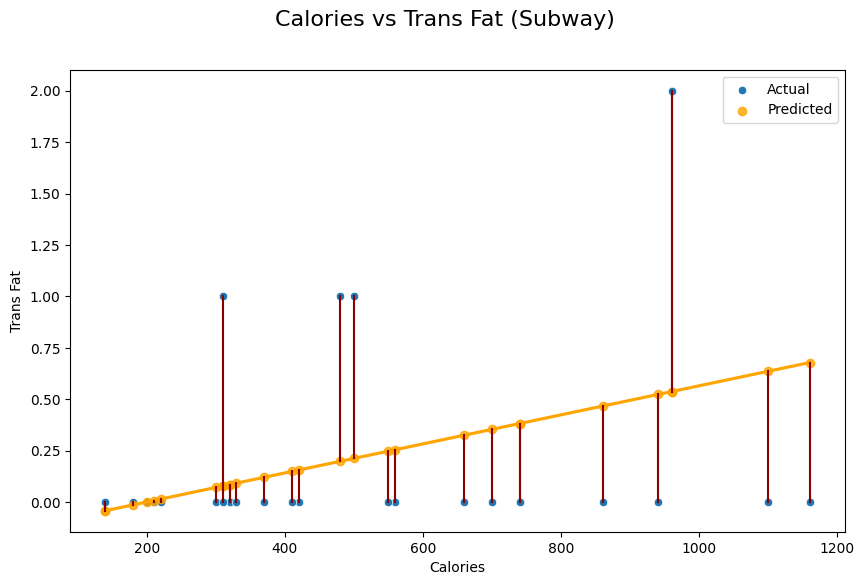

In [ ]:
subway_data = df[df['restaurant'] == 'Subway']
y = subway_data['trans_fat']
X = subway_data['calories']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
lr = stats.linregress(x_train, y_train)
predictions = x_test * lr.slope + lr.intercept
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
#print(predictions)
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')

sns.regplot(x=x_test, y=predictions, fit_reg=True, ci=None, ax=ax, label='Predicted', color='orange')
ax.legend()
fig.suptitle('Calories vs Trans Fat (Subway)', fontsize=16)

for i in range(x_test.size):
    plt.plot([x_test.iloc[i], x_test.iloc[i]], [y_test.iloc[i], predictions.iloc[i]], color='darkred')
plt.ylabel('Trans Fat')
plt.xlabel('Calories')
plt.show()

Mean Squared Error (MSE): 0.1111111111111111


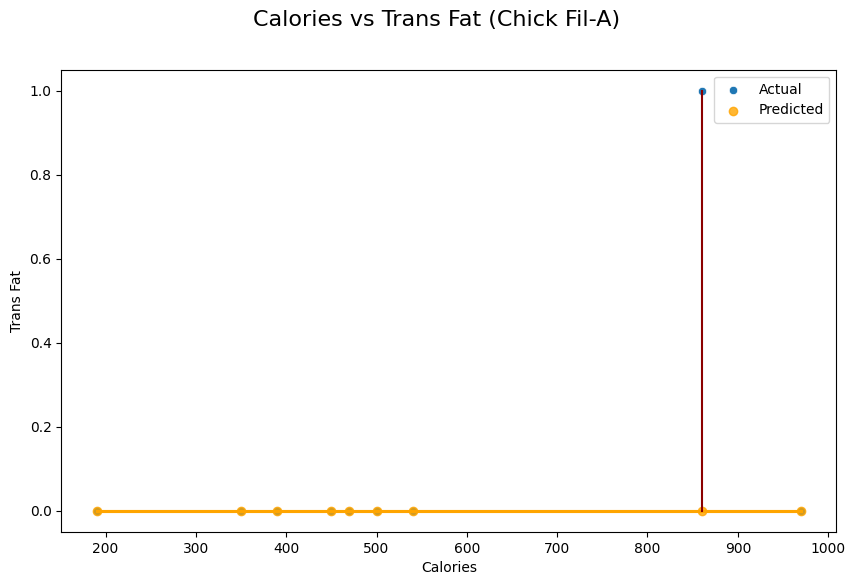

In [ ]:
chick_fil_data = df[df['restaurant'] == 'Chick Fil-A']
y = chick_fil_data['trans_fat']
X = chick_fil_data['calories']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
lr = stats.linregress(x_train, y_train)
predictions = x_test * lr.slope + lr.intercept
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
#print(predictions)
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')

sns.regplot(x=x_test, y=predictions, fit_reg=True, ci=None, ax=ax, label='Predicted', color='orange')
ax.legend()
fig.suptitle('Calories vs Trans Fat (Chick Fil-A)', fontsize=16)

for i in range(x_test.size):
    plt.plot([x_test.iloc[i], x_test.iloc[i]], [y_test.iloc[i], predictions.iloc[i]], color='darkred')
plt.ylabel('Trans Fat')
plt.xlabel('Calories')
plt.show()

Mean Squared Error (MSE): 0.2614906297780273


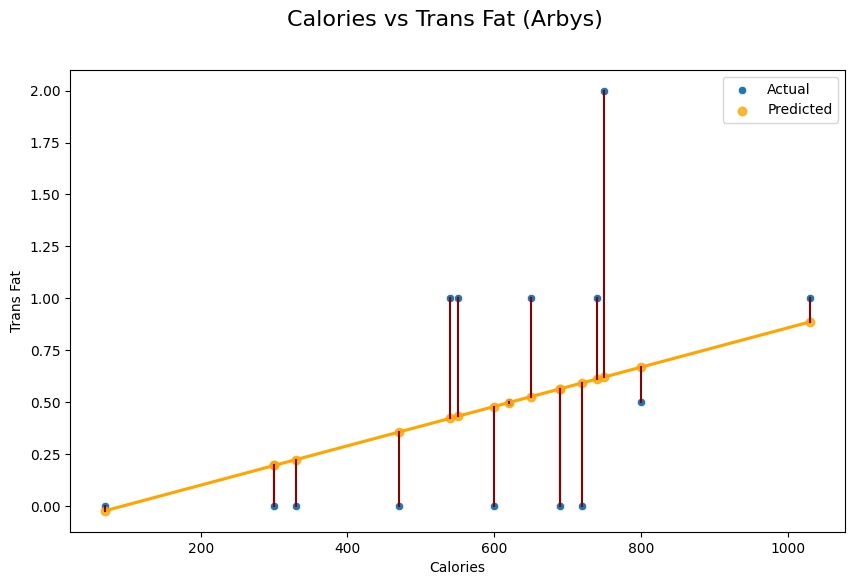

In [ ]:
arbys_data = df[df['restaurant'] == 'Arbys']
y = arbys_data['trans_fat']
X = arbys_data['calories']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
lr = stats.linregress(x_train, y_train)
predictions = x_test * lr.slope + lr.intercept
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
#print(predictions)
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')

sns.regplot(x=x_test, y=predictions, fit_reg=True, ci=None, ax=ax, label='Predicted', color='orange')
ax.legend()
fig.suptitle('Calories vs Trans Fat (Arbys)', fontsize=16)

for i in range(x_test.size):
    plt.plot([x_test.iloc[i], x_test.iloc[i]], [y_test.iloc[i], predictions.iloc[i]], color='darkred')
plt.ylabel('Trans Fat')
plt.xlabel('Calories')
plt.show()

Mean Squared Error (MSE): 0.4124045665155416


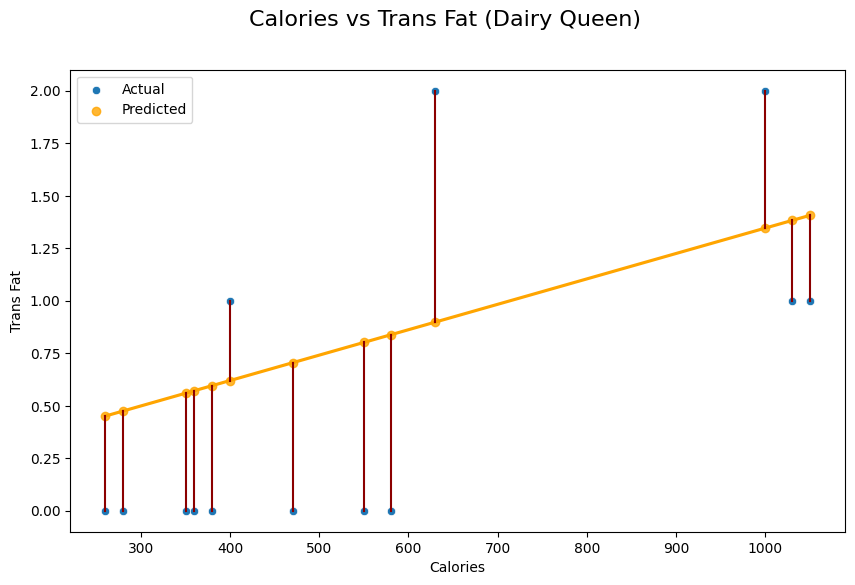

In [ ]:
dairy_queen_data = df[df['restaurant'] == 'Dairy Queen']
y = dairy_queen_data['trans_fat']
X = dairy_queen_data['calories']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
lr = stats.linregress(x_train, y_train)
predictions = x_test * lr.slope + lr.intercept
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
#print(predictions)
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')

sns.regplot(x=x_test, y=predictions, fit_reg=True, ci=None, ax=ax, label='Predicted', color='orange')
ax.legend()
fig.suptitle('Calories vs Trans Fat (Dairy Queen)', fontsize=16)

for i in range(x_test.size):
    plt.plot([x_test.iloc[i], x_test.iloc[i]], [y_test.iloc[i], predictions.iloc[i]], color='darkred')
plt.ylabel('Trans Fat')
plt.xlabel('Calories')
plt.show()

Mean Squared Error (MSE): 0.23267086467681578


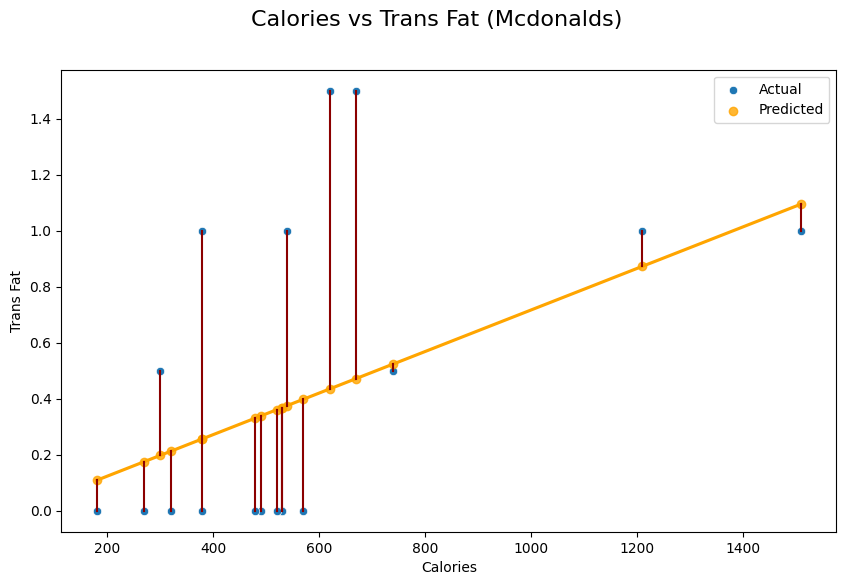

In [ ]:
mc_data = df[df['restaurant'] == 'Mcdonalds']
y = mc_data['trans_fat']
X = mc_data['calories']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
lr = stats.linregress(x_train, y_train)
predictions = x_test * lr.slope + lr.intercept
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
#print(predictions)
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')

sns.regplot(x=x_test, y=predictions, fit_reg=True, ci=None, ax=ax, label='Predicted', color='orange')
ax.legend()
fig.suptitle('Calories vs Trans Fat (Mcdonalds)', fontsize=16)

for i in range(x_test.size):
    plt.plot([x_test.iloc[i], x_test.iloc[i]], [y_test.iloc[i], predictions.iloc[i]], color='darkred')
plt.ylabel('Trans Fat')
plt.xlabel('Calories')
plt.show()

Mean Squared Error (MSE): 1.2143513625900864


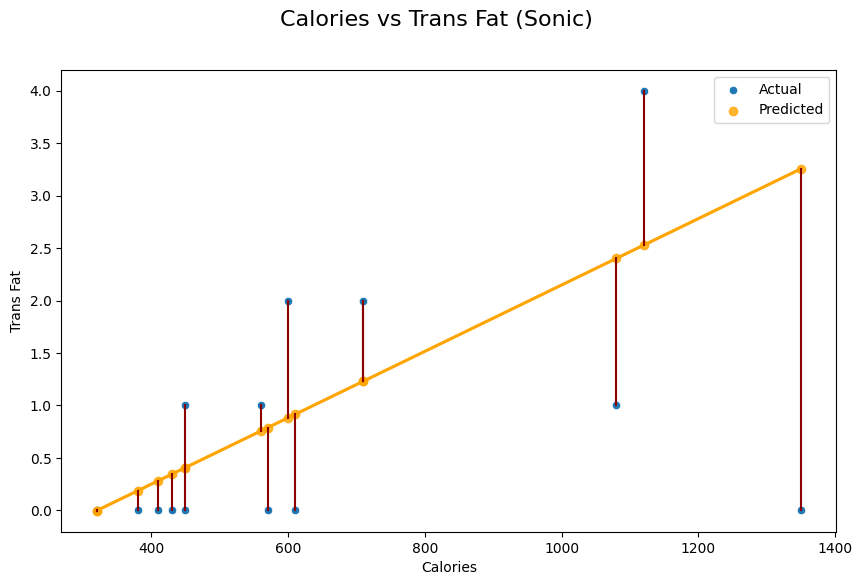

In [ ]:
sonic_data = df[df['restaurant'] == 'Sonic']
y = sonic_data['trans_fat']
X = sonic_data['calories']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
lr = stats.linregress(x_train, y_train)
predictions = x_test * lr.slope + lr.intercept
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
#print(predictions)
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=x_test, y=y_test, ax=ax, label='Actual')

sns.regplot(x=x_test, y=predictions, fit_reg=True, ci=None, ax=ax, label='Predicted', color='orange')
ax.legend()
fig.suptitle('Calories vs Trans Fat (Sonic)', fontsize=16)

for i in range(x_test.size):
    plt.plot([x_test.iloc[i], x_test.iloc[i]], [y_test.iloc[i], predictions.iloc[i]], color='darkred')
plt.ylabel('Trans Fat')
plt.xlabel('Calories')
plt.show()

Conclusion: From the model, we can see that Burger King is predicted to have more trans fat per calories to any other fast food restaurants.

**Changed**

Overall, from the bar graphs, one sample one tailed t-test, and the linear regression model, Burger King is the unhealthiest among the other fast food restaurants present in the fastfood.csv dataset.

As I said in my presentation, even though the other fast food restaurant seem to be healthier in a way compared to Burger King, it really isn't. Excessive consumption of fast food items are still very unhealthy for you, and can cause numerous health problems, even obesity.